# Prueba de Python sobre ventas de tienda Gran Sayaman

In [68]:
# Importando librerías
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Lectura de CSV
ruta_archivo = "Datasets\\VentasGranSayaman.csv"
df_ventas = pd.read_csv(ruta_archivo)

df_ventas

,fecha,producto,cantidad,precio_unitario
0,1/1/2024,Producto A,10,5
1,1/1/2024,Producto B,5,10
2,1/2/2024,Producto A,20,5
3,1/2/2024,Producto C,15,7
4,1/3/2024,Producto B,10,10
5,1/3/2024,Producto C,5,7


In [70]:
# Convertir columna fecha a formato fecha
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])

In [71]:
# Limpieza en caso se requiera retirar los valores nulos de cada variable
df_ventas_limpio = df_ventas.loc[
    df_ventas['fecha'].notnull() &
    df_ventas['producto'].notnull() &
    df_ventas['cantidad'].notnull() &
    df_ventas['precio_unitario'].notnull()]

In [72]:
# Total de ventas por producto
df_ventas_x_producto = df_ventas_limpio.groupby('producto')['cantidad'].sum().reset_index()
df_ventas_x_producto

,producto,cantidad
0,Producto A,30
1,Producto B,15
2,Producto C,20


In [73]:
# Producto más vendido según el valor de venta (precio x cantidad vendida)
df_ventas_limpio['valor_venta'] = df_ventas_limpio['cantidad'] * df_ventas_limpio['precio_unitario']

In [74]:
# Los 5 días con mayor cantidad de ventas (Solo cantidad)

# Crear un dataset con informacion agregada de cantidad de ventas por día
df_ventas_x_dia = df_ventas_limpio.groupby('fecha')['cantidad'].sum().reset_index()

# Obtener el top 5 de cantidades vendidas
df_top_5_cantidad = df_ventas_x_dia.nlargest(5, 'cantidad')

# Mostrar las fechas del top 5
df_top_5_cantidad['fecha']

1   2024-01-02
0   2024-01-01
2   2024-01-03
Name: fecha, dtype: datetime64[ns]

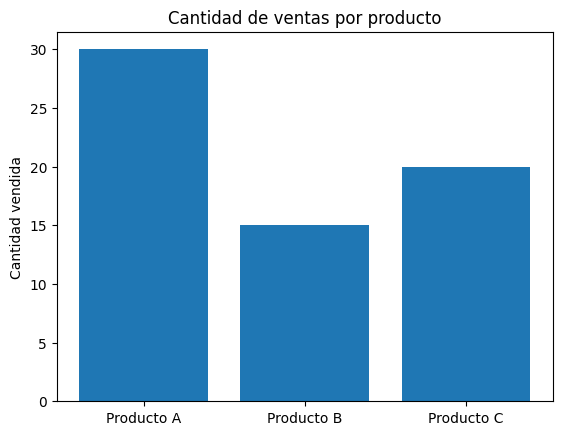

In [75]:
# Gráfico de ventas por producto
plt.bar(df_ventas_x_producto['producto'], df_ventas_x_producto['cantidad'])

plt.ylabel("Cantidad vendida")
plt.title("Cantidad de ventas por producto")
plt.show()